In [10]:
import flax 
import flax.linen as nn
from flax.training import train_state, checkpoints
from flax.core.frozen_dict import unfreeze, freeze

from utils.dataloader import mel_dataset
from torch.utils.data import DataLoader, random_split

import jax
import numpy as np
import jax.numpy as jnp
import optax

from torch.utils.tensorboard import SummaryWriter
import os
from tqdm import tqdm
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = mel_dataset('/mnt/disks/sdb/dataset', 'total')

Load song_meta.json...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 707989/707989 [00:00<00:00, 739516.86it/s]


Load complete!

Load file list...


710it [01:08, 10.32it/s]


In [11]:
linear = np.load('./result/SimCLR_1_linear_array.npy')

In [12]:
def knob_cos_sim(A, B,c):
      return dot(A*c, B)/((norm(A*c)) *norm(B))
    
def cos_sim(A, B):
      return dot(A, B)/((norm(A)) *norm(B))
    
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def kl(P,Q):
    epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
        
    return divergence

In [13]:
def kl_div(p, q):
    epsilon = 0.00001
    
    p = np.asarray(p+epsilon, dtype=np.float64)
    q = np.asarray(q+epsilon, dtype=np.float64)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [14]:
answer = []
for i in linear:
    if np.argmax(i[0])==np.argmax(i[1]):
        answer.append(i)

In [15]:
answer = np.array(answer)

In [16]:
linear_list = []
for i in range(answer.shape[0]):
    temp = softmax(answer[i][0])
    linear_list.append(temp)

In [17]:
linear_list = np.stack(linear_list)

In [19]:
knob = np.ones((14))
knob[5] = 2 

In [20]:
knob

array([1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
a = linear_list[0] * knob

In [27]:
answer[0][1].argmax()

3

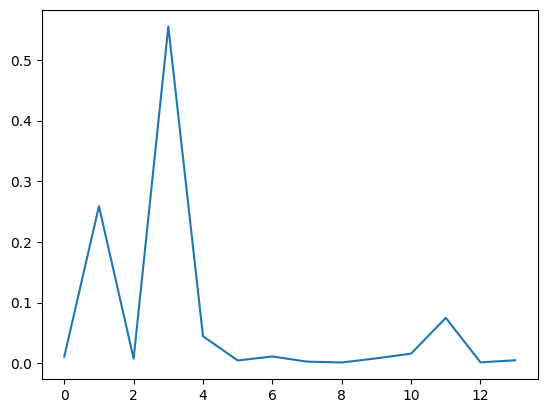

In [54]:
plt.plot(linear_list[0])


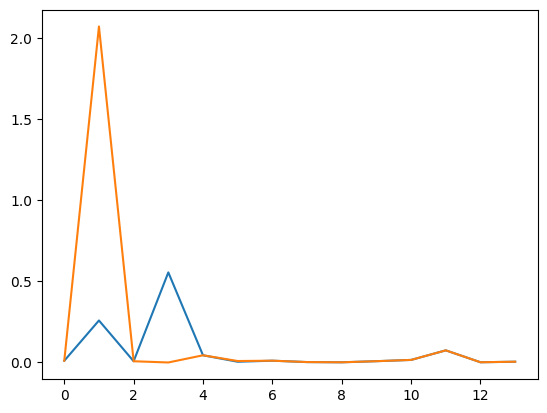

In [74]:
plt.plot(linear_list[0])
plt.plot(a)

In [71]:
knob = np.ones((14))

In [61]:
knob[11] = 1

In [72]:
knob[1] = 8
knob[3] = 0
# knob[11] = 10

In [65]:
a = linear_list[0] * knob

In [75]:
knob_kl_list = []
for i in range(0, len(linear_list)):
        kl = kl_div((a), (linear_list[i]))
        knob_kl_list.append(kl)

In [76]:
linear_list[0]

array([0.01060801, 0.25880269, 0.00756258, 0.55508193, 0.04436722,
       0.00446389, 0.01101459, 0.00248732, 0.00112942, 0.00793466,
       0.0157589 , 0.07469195, 0.0013514 , 0.00474545])

In [79]:
a

array([1.06080055e-02, 2.07042150e+00, 7.56258362e-03, 0.00000000e+00,
       4.43672163e-02, 8.92778375e-03, 1.10145865e-02, 2.48731563e-03,
       1.12942225e-03, 7.93465535e-03, 1.57589032e-02, 7.46919472e-02,
       1.35139922e-03, 4.74545373e-03])

In [80]:
sorted(knob_kl_list)[0]

1.8665121741822281

In [33]:
def kl(P,Q):
    epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
        
    return divergence

In [40]:
knob_kl_list = []
for i in range(0, len(linear_list)):
        kl = kl_div((a), (linear_list[i]))
        knob_kl_list.append(kl)

In [41]:
sorted(knob_kl_list)[0]

-0.21439133483952205

In [42]:
knob_kl_list.index(-0.21439133483952205)

256155

In [43]:
answer[256155][1].argmax()

1

In [210]:
answer[0][1].argmax()

3

In [201]:
knob_kl_list.index(-0.04254585826867579)

125474

In [202]:
answer[125474][1].argmax()

5

In [211]:
answer[0][1].argmax()

3

In [101]:
knob_kl_list.index(0.006656880419015968)

164229

In [79]:
answer[10261][1].argmax()

1

In [102]:
answer[164229][1].argmax()

7

In [212]:
knob

array([1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.])

In [213]:
temp_cos = []
for i in range(0, len(linear_list)):
    cos = cos_sim(a, linear_list[i])
    temp_cos.append(cos)

In [214]:
sorted(temp_cos)[-5:]

[0.9996977769607932,
 0.9997003201211699,
 0.9998103658137202,
 0.9998596339661557,
 0.9999740116826016]

In [216]:
temp_cos.index(0.9996977769607932)

9264

In [218]:
answer[9264][1].argmax()

3

In [223]:
linear_list[9264]

array([0.0108032 , 0.26272919, 0.00804747, 0.55671607, 0.05200358,
       0.00421935, 0.01057501, 0.00310716, 0.00121806, 0.00787822,
       0.01033795, 0.06432045, 0.00212013, 0.00592415])

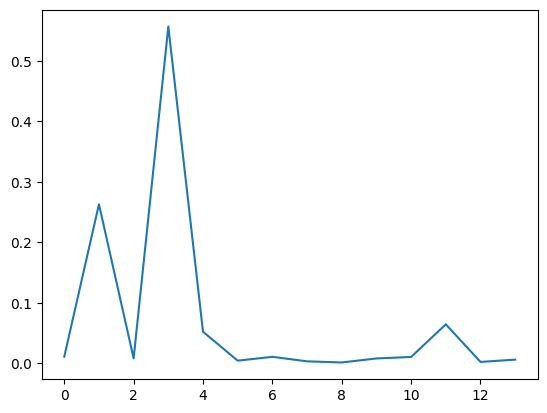

In [224]:
plt.plot(linear_list[9264])

In [195]:
temp_cos.index(0.9999996544740996)

195799

In [196]:
answer[195799][1].argmax()

5

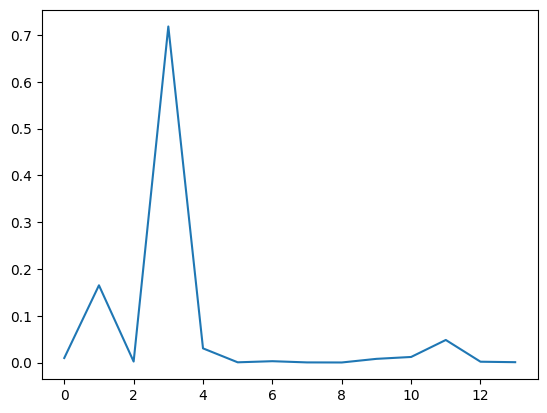

In [136]:
plt.plot(linear_list[96150])

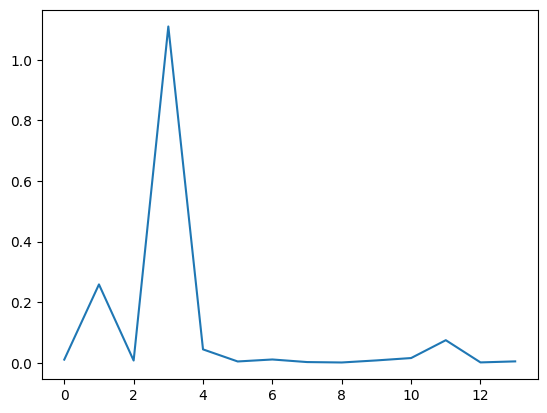

In [54]:
knob_kl_list.index(0.0004600596444521642)

120498

In [55]:
answer[120498][1].argmax()

1

In [59]:
a

array([0.        , 0.        , 0.        , 0.00021558, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

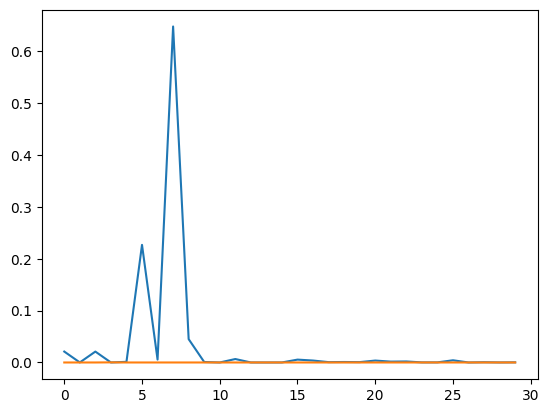

In [58]:
plt.plot(linear_list[0])
plt.plot(a)

In [ ]:
knob_cos_list = []
for i in range(0, len(linear_list)):
        cos = knob_cos_sim(linear_list[0], linear_list[i], knob)
        knob_cos_list.append(cos) 

In [ ]:
sorted(knob_cos_list)[:5]

In [ ]:
knob_cos_list.index(0.00010930368698776733)

In [ ]:
answer[80073][1].argmax()

In [ ]:
knob_cos_list.index(0.0001384588728429575)

In [ ]:
answer[72752][1].argmax()

In [ ]:
knob_cos_list.index(0.000143127864512996)

In [ ]:
answer[159696][1].argmax()

In [ ]:
knob_cos_list.index(0.00014745429153686782)

In [ ]:
answer[1851][1].argmax()

In [ ]:
cos_list = []
for i in range(0, len(linear_list)):
    cos = cos_sim(linear_list[0], linear_list[i])
    cos_list.append(cos)

In [ ]:
cos_list.index(sorted(cos_list)[-2])

In [ ]:
answer[0][1].argmax()

In [ ]:
answer[174006][1].argmax()

In [ ]:
linear_list[0]

In [ ]:
knob

In [ ]:
linear_list[0] * knob

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(linear_list[0])

In [ ]:
plt.plot(linear_list[20])

In [ ]:
cos_sim(linear[0][0],linear[0][1])

In [ ]:
cos_list = []
for i in range(0, len(linear_list)):
    cos = cos_sim(linear_list[0], linear_list[i])
    cos_list.append(cos)

In [ ]:
temp_knob

In [ ]:
a = softmax(linear[0][0]) * temp_knob

In [ ]:
temp_knob = np.zeros((30))
temp_knob[3] = 1

In [ ]:
temp_cos = []
for i in range(0, len(linear_list)):
    cos = cos_sim(a, linear_list[i])
    temp_cos.append(cos)

In [ ]:
temp_cos.index(sorted(temp_cos)[-2])

In [ ]:
answer[145091][1].argmax()

In [ ]:
a

In [ ]:
temp_cos = []
for i in range(0, len(linear_list)):
    cos = cos_sim(a, linear_list[i])
    temp_cos.append(cos)
    
temp_cos.index(sorted(temp_cos)[-2])

In [ ]:
answer[52746][1].argmax()

In [ ]:
linear[0][1].argmax()

In [ ]:
temp_knob

In [ ]:
linear[145091][0]

In [ ]:
a

In [ ]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [ ]:
a

In [ ]:
linear_list[1].sum()

In [ ]:
temp_jaccard = []
for i in range(0, len(linear_list)):
    cos = jaccard(a, linear_list[i])
    temp_jaccard.append(cos)

In [ ]:
pip install scipy

In [ ]:
import scipy
import numpy as np

In [ ]:
a = np.array([ 0.        , -0.        ,  0.        , -8.32216263, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [ ]:
b = np.array([ -1.82002723,   2.56267071,  -2.39117432,  -0.03381836,
         1.424389  ,  -4.35428524,  -3.56955099,  -4.12682819,
        -3.44481683,  -6.05371857, -22.32224274,  -3.35192418,
        -4.69356441,  -7.92695808,  -4.27410269,  -2.92182684,
        -0.05742344,  -4.08171272,  -2.96780586,  -1.81448281,
        -1.07761526,  -4.622262  ,   0.58191574,  -4.31378508,
        -2.26041031,  -5.45954609, -22.32127953,  -3.05525255,
        -5.72118902,  -2.81810474])

In [ ]:
scipy.spatial.distance.jensenshannon(a,b,axis=0)

In [ ]:
#!/usr/bin/env python
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

In [ ]:
JSD(a,b)

In [ ]:
from math import log2

In [ ]:
def kl(P,Q):
    epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
        
    return divergence